## Hypothesis 8
H0: The earth region of the location has no effect on the longwave radiation

Ha: Tropical locations have higher longwave radiation than temperate locations

In [78]:
!pip install rioxarray
!pip install nc-time-axis

from scipy.stats import ttest_ind
import numpy as np
from statsmodels.stats.weightstats import ztest as ztest
import seaborn as sns
import netCDF4 as nc
import rioxarray
import matplotlib.pyplot as plt
import xarray as xr
import cftime
import pandas as pd
import nc_time_axis

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
radiation_file = '/content/drive/MyDrive/Colab Notebooks/Data/olr.mon.ltm.1981-2010.nc'
radiation_dataset = nc.Dataset(radiation_file, mode='r')
print(radiation_dataset)
print(radiation_dataset.variables.keys())

In [ ]:
#open netCDF file with rioxarray
xr = rioxarray.open_rasterio(radiation_file)

#xr.attrs['units'] = 'Standardized Units of Relative Dry and Wet'
xr = xr[1]
xr.attrs

## Gridded Data Plotted

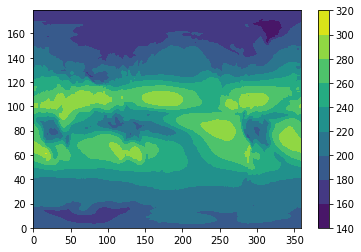

In [54]:
plt.contourf(xr['olr'][0,:,:])
plt.colorbar()

In [40]:
#Get data from Tropical locations

ds_corpus_radiation = xr.sel(x=263.25, y=28.25, method="nearest")
ds_villahermosa_radiation = xr.sel(x=268.25, y=18.25, method="nearest")
ds_puerto_escondido_radiation = xr.sel(x=262.41, y=16.41, method="nearest")


In [19]:
#Get data from Temperate locations
ds_new_york_radiation = xr.sel(x=285.0, y=40.0, method="nearest")
ds_siberia_radiation = xr.sel(x=137.41, y=63.41, method="nearest")
ds_seattle_radiation = xr.sel(x=237.5, y=40.0, method="nearest")

In [20]:
#Convert to dataframe

df_corpus_radiation = ds_corpus_radiation.to_dataframe()
df_corpus_radiation = df_corpus_radiation.reset_index()

df_villahermosa_radiation = ds_villahermosa_radiation.to_dataframe()
df_villahermosa_radiation = df_villahermosa_radiation.reset_index()

df_puerto_escondido_radiation = ds_puerto_escondido_radiation.to_dataframe()
df_puerto_escondido_radiation = df_puerto_escondido_radiation.reset_index()

df_new_york_radiation = ds_new_york_radiation.to_dataframe()
df_new_york_radiation = df_new_york_radiation.reset_index()

df_siberia_radiation = ds_siberia_radiation.to_dataframe()
df_siberia_radiation = df_siberia_radiation.reset_index()

df_seattle_radiation = ds_seattle_radiation.to_dataframe()
df_seattle_radiation = df_seattle_radiation.reset_index()

In [63]:
tropical_data = pd.concat([df_corpus_radiation,df_villahermosa_radiation,df_puerto_escondido_radiation])
temperate_data = pd.concat([df_new_york_radiation,df_seattle_radiation,df_siberia_radiation])

## Display Data Dristribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


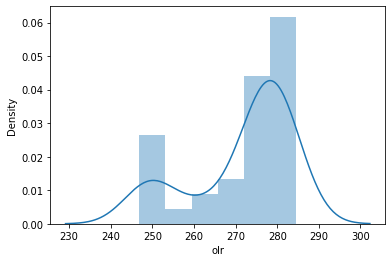

In [64]:
sns.distplot(tropical_data['olr'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


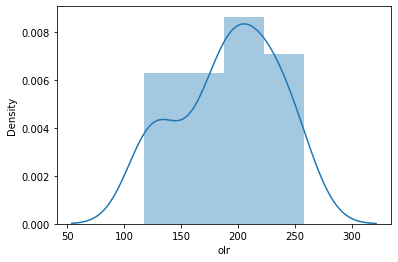

In [66]:
sns.distplot(temperate_data['olr'])
plt.show()

In [77]:
np_temperate = temperate_data['olr'].to_numpy()
np_tropical = tropical_data['olr'].to_numpy()

(36,)

## Peform Hypotheses Tests

In [72]:

tropical_mean = np.mean(np_tropical)
temperate_mean = np.mean(np_temperate)
ttest,pval = ttest_ind(np_temperate,np_tropical)
print("p-value",pval)
'{:f}'.format(pval)

p-value 1.8911245980476573e-16


'0.000000'

In [79]:

#perform two sample z-test
p_value = ztest(np_temperate, np_tropical, value=0)[1]
#print p-value
print("p-value",p_value)
'{:f}'.format(p_value)

p-value 6.628320957504908e-27


'0.000000'